 # Clustering Algorithm

The objective is to apply clustering techniques to a real-world dataset.

# Loading and Preprocessing 

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster 


In [7]:
pip install kneed


Note: you may need to restart the kernel to use updated packages.


In [21]:
# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [9]:
df.isnull().sum()    
# No nullvalues

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


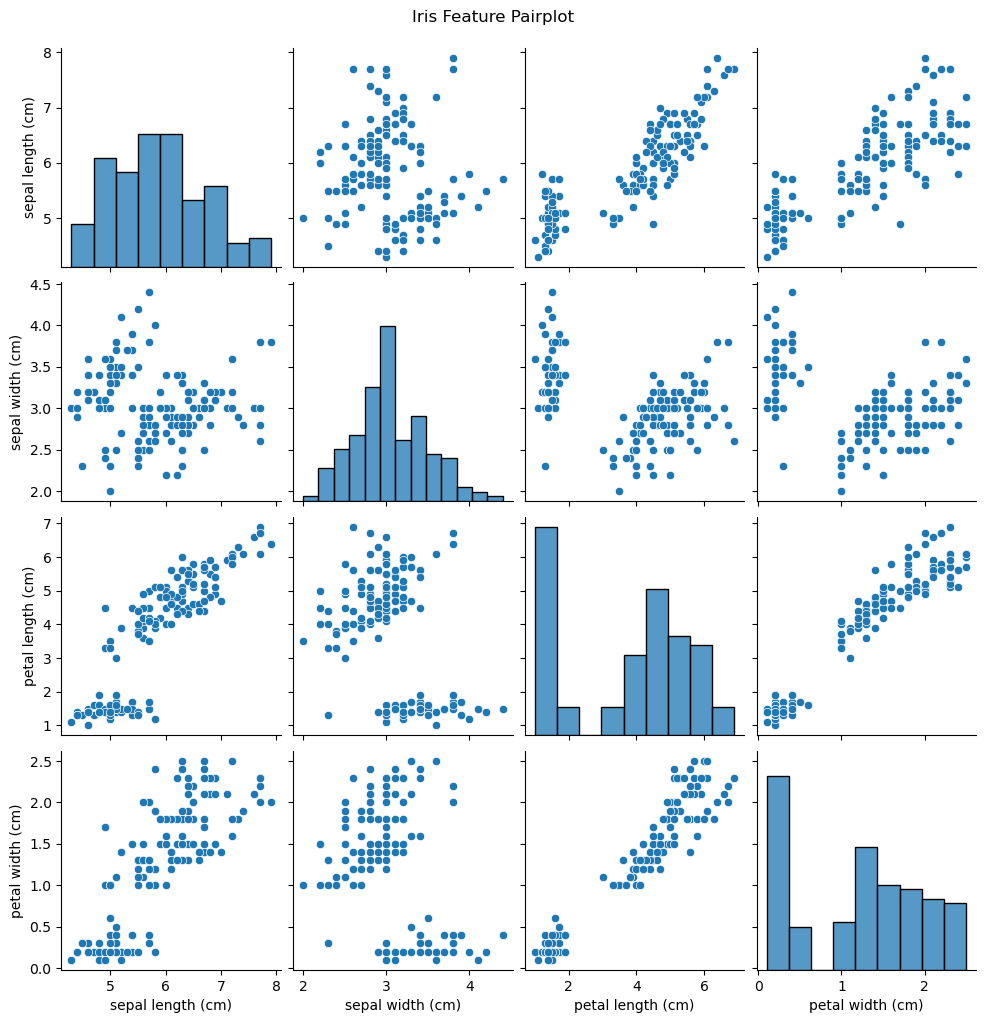

In [11]:
# Pairplot to visualize relationships between features
sns.pairplot(df)
plt.suptitle("Iris Feature Pairplot", y=1.02)
plt.show()

In [12]:
# Scaling using StandardScaler()
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

# KMeans Clustering

K-Means is an unsupervised learning algorithm that groups data into clusters based on feature similarity.
In Iris, the data naturally forms 3 clusters (species), which makes it ideal for demonstrating K-Means.

In [15]:
distances = []
for i in range(1,11):
    model = KMeans(n_clusters = i)
    model.fit(scaled_df)
    distances.append(model.inertia_)

distances


C:\Users\prave\anaconda3\anaconda3_1\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\prave\anaconda3\anaconda3_1\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\prave\anaconda3\anaconda3_1\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\prave\anaconda3\anaconda3_1\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

[600.0,
 222.36170496502308,
 140.0327527742865,
 114.35376317214961,
 91.63092085355163,
 80.03656633461696,
 73.24893963629374,
 65.00579227636666,
 60.56679271427513,
 51.081985746054855]

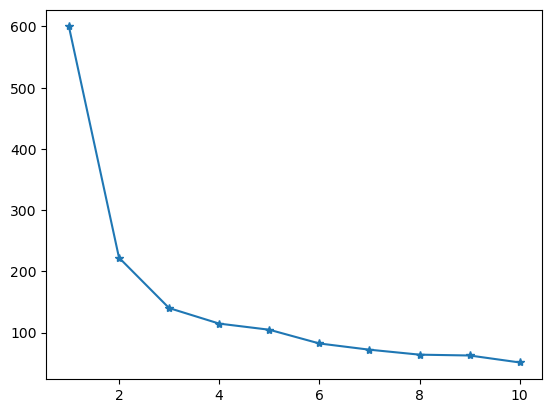

In [14]:
plt.plot(range(1, 11), distances, marker="*")

In [20]:
knee = KneeLocator(range(1, 11), distances, curve="convex", direction="decreasing")
knee.elbow

3

Here the optimal value  for k is 3 that is number of cluster is 3 

In [24]:
model = KMeans(n_clusters = 3)


In [29]:
result = model.fit(scaled_df)
result

C:\Users\prave\anaconda3\anaconda3_1\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

# Hierarchical Clustering

Hierarchical Clustering is an unsupervised machine learning algorithm used to group similar data points into clusters. Unlike KMeans, it does not require specifying the number of clusters beforehand.
There are two main types:
* Agglomerative (bottom-up): Starts with each data point as its own cluster, then merges the closest pairs step by step.
* Divisive (top-down): Starts with one big cluster and splits it into smaller clusters.
* It builds a dendrogram (tree structure) showing how clusters merge or split.

  
 Why Hierarchical Clustering for the Iris Dataset?
 
* Iris dataset has clear structure and is small (150 rows) — perfect for dendrogram-based clustering.
* It helps visualize how clusters form step by step.
* You don't need to specify number of clusters in advance (dendrogram helps you decide).

In [61]:
# Perform hierarchical clustering (using Ward's method)
linkage_matrix = linkage(scaled_df, method='ward')


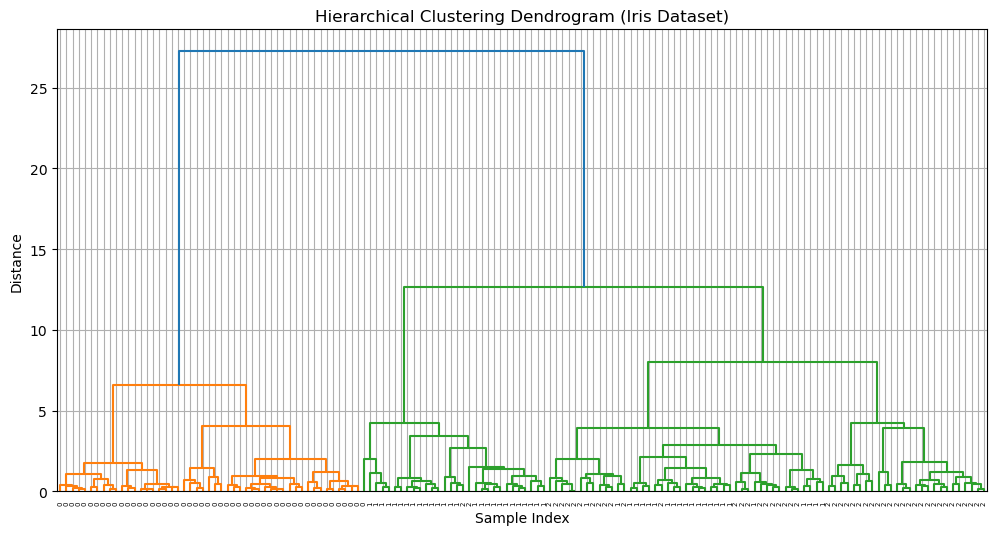

In [62]:

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, labels=iris.target, leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram (Iris Dataset)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

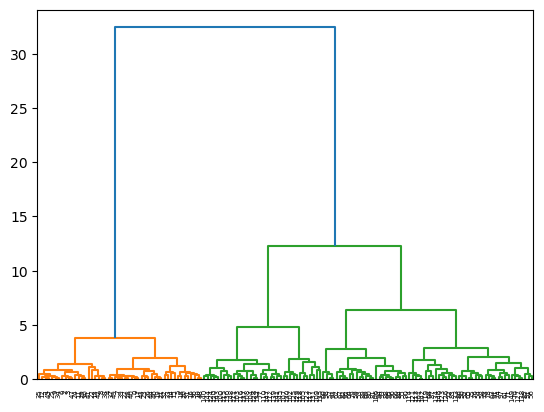

In [64]:
#############################
dendrogram(linkage(df, method="ward"))
plt.show()

In [67]:
model = AgglomerativeClustering(n_clusters=3)

In [69]:
result=model.fit_predict(df)

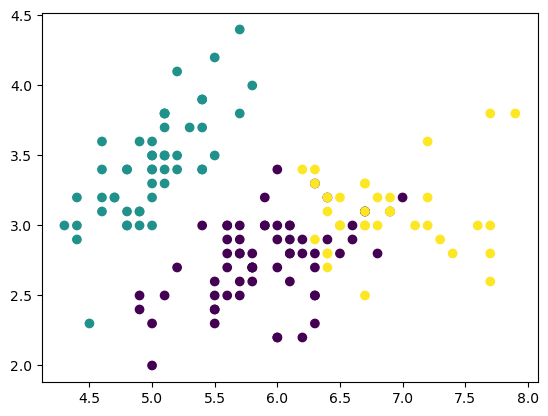

In [71]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=result)